## Building Applications Powered by LLMs with LangChain

### Introduction

LangChain is designed to assist developers in building end-to-end applications using language models. It offers an array of tools, components, and interfaces that simplify the process of creating applications powered by large language models and chat models. LangChain streamlines managing interactions with LLMs, chaining together multiple components, and integrating additional resources, such as APIs and databases. Having gained a foundational understanding of the library in previous lesson, let's now explore various examples of utilizing prompts to accomplish multiple tasks.

### Prompt use case:

A key feature of LangChain is its support for prompts, which encompasses prompt management, prompt optimization, and a generic interface for all LLMs. The framework also provides common utilities for working with LLMs.

ChatPromptTemplate is used to create a structured conversation with the AI model, making it easier to manage the flow and content of the conversation. In LangChain, message prompt templates are used to construct and work with prompts, allowing us to exploit the underlying chat model's potential fully.

System and Human prompts differ in their roles and purposes when interacting with chat models. SystemMessagePromptTemplate provides initial instructions, context, or data for the AI model, while HumanMessagePromptTemplate are messages from the user that the AI model responds to.

To illustrate it, let’s create a chat-based assistant that helps users find information about movies. Ensure your OpenAI key is stored in environment variables using the “OPENAI_API_KEY” name. Remember to install the required packages with the following command: pip install langchain==0.1.4 deeplake openai==1.10.0 tiktoken pypdf.

In [6]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
chat = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

template = "You are an assistant that helps users find information about movies."
system_message_prompt = SystemMessagePromptTemplate.from_template(template)
human_template = "Find information about the movie {movie_title}."
human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

response = chat(chat_prompt.format_prompt(movie_title="Inception").to_messages())

print(response.content)

"Inception" is a 2010 science fiction action film written and directed by Christopher Nolan. The film stars Leonardo DiCaprio as a professional thief who steals information by entering the subconscious minds of his targets through their dreams. The ensemble cast also includes Joseph Gordon-Levitt, Ellen Page, Tom Hardy, Ken Watanabe, and Marion Cotillard.

The movie explores the concept of dream sharing and features stunning visual effects and mind-bending action sequences. "Inception" received critical acclaim for its originality, storytelling, and visual effects, and was a commercial success at the box office.

If you have any specific questions or need more information about "Inception," feel free to ask!


Using the to_messages object in LangChain allows you to convert the formatted value of a chat prompt template into a list of message objects. This is useful when working with chat models, as it provides a structured way to manage the conversation and ensures that the chat model can understand the context and roles of the messages.

### Summarization chain example:

LangChain prompts can be found in various use cases, such as summarization or question-answering chains. For example, when creating a summarization chain, LangChain enables interaction with an external data source to fetch data for use in the generation step. This could involve summarizing a lengthy piece of text or answering questions using specific data sources.

The following code will initialize the language model using OpenAI class with a temperature of 0 - because we want deterministic output.  The load_summarize_chain function accepts an instance of the language model and returns a pre-built summarization chain. Lastly, the PyPDFLoader class is responsible for loading PDF files and converting them into a format suitable for processing by LangChain. 

It is important to note that you need to install the pypdf package to run the following code. Although it is highly recommended to install the latest versions of this package, the codes have been tested on version 3.10.0. Please refer to course introduction lesson for more information on installing packages. 

### Notes:
Have to use the different model (non instruct/chat model) to process the summarization task

In [18]:
# Import necessary modules
from langchain import OpenAI, PromptTemplate
from langchain.chains.summarize import load_summarize_chain
from langchain.document_loaders import PyPDFLoader
from langchain.chat_models import ChatOpenAI

# Initialize language model
#llm = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0)
# Switching to non instruct (non chat model) can work, but it replies nothing provided for summarizing...
llm = OpenAI(model_name="gpt-3.5-turbo-16k", temperature=0)


# Load the summarization chain
summarize_chain = load_summarize_chain(llm)

# Load the document using PyPDFLoader
document_loader = PyPDFLoader(file_path="The One Page Linux Manual.pdf")
document = document_loader.load()

print(document)

# Summarize the document
summary = summarize_chain(document)
print(summary['output_text'])

[Document(page_content='THE ONE     PAGE LINUX MANUALA summary of useful Linux commands\nVersion 3.0 May 1999 squadron@powerup.com.au\nStarting & Stopping\nshutdown -h now Shutdown the system now and do not\nreboot\nhalt Stop all processes - same as above\nshutdown -r 5 Shutdown the system in 5 minutes and\nreboot\nshutdown -r now Shutdown the system now and reboot\nreboot Stop all processes and then reboot - same\nas above\nstartx Start the X system\nAccessing & mounting file systems\nmount -t iso9660 /dev/cdrom\n/mnt/cdromMount the device cdrom\nand call it cdrom under the\n/mnt directory\nmount -t msdos /dev/hdd\n/mnt/ddriveMount hard disk “d” as a\nmsdos file system and call\nit ddrive under the /mnt\ndirectory\nmount -t vfat /dev/hda1\n/mnt/cdriveMount hard disk “a” as a\nVFAT file system and call it\ncdrive under the /mnt\ndirectory\numount /mnt/cdrom Unmount the cdrom\nFinding files and text within files\nfind / -name  fname Starting with the root directory, look\nfor the file c

The sample code.

This document provides a summary of useful Linux commands for starting and stopping, accessing and mounting file systems, finding files and text within files, the X Window System, moving, copying, deleting and viewing files, installing software, user administration, little known tips and tricks, configuration files and what they do, file permissions, X shortcuts, printing, and a link to an official Linux pocket protector.

The output. The output above is based on the “The One Page Linux Manual” PDF file accessible at this URL(https://www.cheat-sheets.org/saved-copy/The%20One%20Page%20Linux%20Manual.pdf).

In this example, the code uses the default summarization chain provided by the load_summarize_chain function. However, you can customize the summarization process by providing prompt templates.

Let’s recap:  OpenAI is initialized with a temperature of 0 for focused and deterministic language model generation. The load_summarize_chain function loads a summarization chain, and PyPDFLoader fetches PDF data, which is loaded as a string input for the summarization chain, generating a summary of the text.

Another good summarization tutorial for LangChain:

There are 3 main ways to implement the summarization process, depending on the task type.

https://medium.com/@abonia/summarization-with-langchain-b3d83c030889

### QA chain example:

We can also use LangChain to manage prompts for asking general questions from the LLMs. These models are proficient in addressing fundamental inquiries. Nevertheless, it is crucial to remain mindful of the potential issue of hallucinations, where the models may generate non-factual information. To address this concern, we will later introduce the Retrieval chain as a means to overcome this problem.

### Notes:

gpt-3.5-turbo-instruct is not a chat model even though it has the wording "instruct".

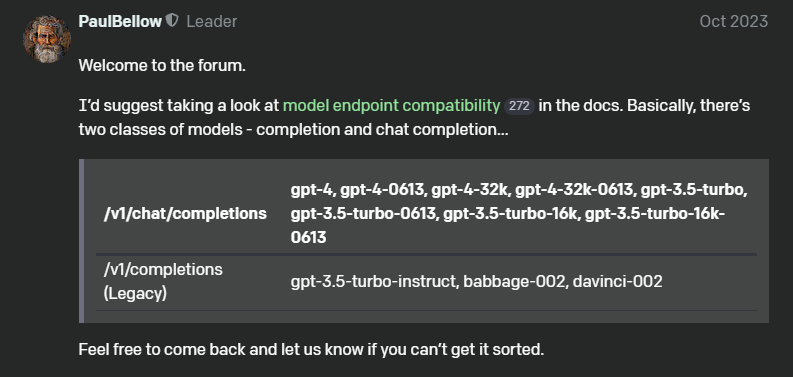

In [1]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.llms import OpenAI

prompt = PromptTemplate(template="Question: {question}\nAnswer:", input_variables=["question"])

#llm = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0)
llm = OpenAI(model_name="gpt-3.5-turbo", temperature=0)
chain = LLMChain(llm=llm, prompt=prompt)

c:\Users\User\anaconda3\envs\Nate\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.9.9) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
c:\Users\User\anaconda3\envs\Nate\lib\site-packages\langchain\llms\openai.py:179: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
c:\Users\User\anaconda3\envs\Nate\lib\site-packages\langchain\llms\openai.py:753: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


We define a custom prompt template by creating an instance of the PromptTemplate class. The template string contains a placeholder {question} for the input question, followed by a newline character and the "Answer:" label.  The input_variables argument is set to the list of available placeholders in the prompt (like a question in this case) to indicate the name of the variable that the chain will replace in the template.run() method.

We then instantiate an OpenAI model named gpt-3.5-turbowith a temperature of 0. The OpenAI class is used to create the instance, and the model_name and temperature arguments are provided. Finally, we create a question-answering chain using the LLMChain class. 

The class constructor takes two arguments: llm, which is the instantiated OpenAI model, and prompt, which is the custom prompt template we defined earlier. 

By following these steps, we can process input questions effectively with the custom question-answering, generating appropriate answers using the OpenAI model and the custom prompt template.

In [2]:
chain.run("what is the meaning of life?")

'The meaning of life is a philosophical question that has been debated for centuries. Different people and cultures have different beliefs about the purpose and meaning of life. Some believe that the meaning of life is to seek happiness and fulfillment, others believe it is to fulfill a higher purpose or destiny, and some believe that life has no inherent meaning and it is up to each individual to create their own meaning. Ultimately, the meaning of life is a deeply personal and subjective question that each person must grapple with and find their own answer to.'

The sample code.

'The meaning of life is subjective and can vary from person to person. For some, it may be to find happiness and fulfillment, while for others it may be to make a difference in the world. Ultimately, the meaning of life is up to each individual to decide.’

The output.

This example demonstrates how LangChain simplifies the integration of LLMs with custom data sources and prompt templates for question-answering applications. To build more advanced NLP applications, you can further extend this example to include other components, such as data-augmented generation, agents, or memory features.

LangChain's support for chain sequences also allows developers to create more complex applications with multiple calls to LLMs or other utilities. These chains can serve various purposes: personal assistants, chatbots, querying tabular data, interacting with APIs, extraction, evaluation, and summarization.



### Conclusion

LangChain solves the problem of easy integration with other sources of data, tools, and different LLMs by providing a comprehensive framework for managing prompts, optimizing them, and creating a universal interface for all LLMs.

In the next lesson we’ll learn more about popular language models and the recent trend in chat-based language models.
